# **Final Project**

- Group: 7

- Member: 
    + 20127214: Nguyễn Trương Minh Khôi
    + 20127612: Đỗ Khánh Sang

---

## **Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

---

## **1.Collecting Data**

### **1.What subject is your data about?**

Main subject of my data is about reviews all kind of wine around the world such as: the number of points WineEnthusiast rated the wine, the country that the wine is from, the winery that made the wine, the cost for a bottle of the wine,…

### **2.What is the source of your data?**

My team take dataset from [Kaggle](https://www.kaggle.com/)

### **3.Do authors of this data allow you to use like this? You can check the data license**

- The authors totally agree me to use this data because this is a public dataset on kaggle and I can download it
- Data license: `CC BY-NC-SA 4.0`

### **4.How did authors collect data?**

The data was scraped from `WineEnthusiast` during the week of June 15th, 2017. The code for the scraper can be found [here](https://github.com/zackthoutt/wine-deep-learning) if you have any more specific questions about data collection that I didn't address.

## 2.Exploring Data 

### **1. Load data**

First, read data file "winemag-data-130k-v2.csv" from folder `Data` and save to DataFrame `wine_reviews_df`.

In [2]:
wine_reviews_df = pd.read_csv("Data/winemag-data-130k-v2.csv", index_col=0)

In [3]:
wine_reviews_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### **2.How many rows and how many columns?**

Next, get the number of rows and columns of the DataFrame `wine_reviews_df` and store it in `num_rows` and `num_cols` variables.

In [4]:
num_rows = len(wine_reviews_df)
num_cols = len(wine_reviews_df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 129971
Number of columns: 13


### **3.What is the meaning of each row?**

**Each row provides diferent information such as price, country, winery,... about different wines**

### 4.Are there duplicated rows?

We are going to check that and save the result into `have_duplicated_rows`. The value of this variable is `True` if the data is duplicated and vice versa.

In [5]:
if (True in list(wine_reviews_df.duplicated())):
    have_duplicated_rows = True
else:
    have_duplicated_rows = False

have_duplicated_rows

True

The result is True. We can see the data is duplicated. Now, let's see that

In [6]:
# wine_reviews_df[wine_reviews_df.duplicated()]

Having 9983 rows are duplicated. Therefore, we're going to remove these duplicated data

In [7]:
wine_reviews_df = wine_reviews_df.drop_duplicates() 
len(wine_reviews_df)

119988

### 5.What is the meaning of each column?

The data consists of 13 fields:

- **Points**: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
- **Title**: the title of the wine review, which often contains the vintage if you're interested in extracting that feature
- **Variety**: the type of grapes used to make the wine (ie Pinot Noir)
- **Description**: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- **Country**: the country that the wine is from
- **Province**: the province or state that the wine is from
- **Region 1**: the wine growing area in a province or state (ie Napa)
- **Region 2**: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- **Winery**: the winery that made the wine
- **Designation**: the vineyard within the winery where the grapes that made the wine are from
- **Price**: the cost for a bottle of the wine 
- **Taster Name**: name of the person who tasted and reviewed the wine
- **Taster Twitter Handle**: Twitter handle for the person who tasted ane reviewed the wine

### 6.What is the current data type of each column? Are there columns having inappropriate data types?

We check the datatype (`dtype`) of each element in a column in `wine_reviews_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [8]:
col_dtypes = wine_reviews_df.dtypes
col_dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

### 7.With each numerical column, how are values distributed?
- What is the percentage of `missing values`?
- `Min`? `max`? Are they `abnormal`?

For now, there are 2 columns that seem to be numeric data: "points", "price". 

For each of numeric column, we will compute the percentage of missing values; min, max value and store them into a dataframe named `nume_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "min", "max") and 2 columns ("points", "price").

In [9]:
nume_col_profiles_df = pd.DataFrame(columns = ["points", "price"], 
                                    index = ['missing_ratio', 'min', 'max'], data = np.nan)


nume_col_profiles_df.loc['missing_ratio'] = np.array(wine_reviews_df[nume_col_profiles_df.columns].isnull().sum() * 100 
                                             / len(wine_reviews_df[nume_col_profiles_df.columns]))

nume_col_profiles_df.loc['min'] = wine_reviews_df[nume_col_profiles_df.columns].min()

nume_col_profiles_df.loc['max'] = wine_reviews_df[nume_col_profiles_df.columns].max()

# raise NotImplementedError()

nume_col_profiles_df

,points,price
missing_ratio,0.0,6.996533
min,80.0,4.000000
max,100.0,3300.000000


### 8.With each categorical column, how are values distributed?
- What is the percentage of `missing values`?
- How many `different values`? Show a few
- Are they `abnormal`?

`wine_reviews_df` contains 11 categorical columns: "country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery" .

For each of categorical column:
- compute the percentage of missing values 
- number of different values (missing values are not counted), 
- a list of different values (missing values are not counted) 

Then store them into a dataframe named `cate_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "num_diff_vals", "diff_vals") and 11 columns ("country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery").

In [10]:
cate_col_profiles_df = pd.DataFrame(columns = ["country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"],
                                   index = ["missing_ratio", "num_diff_vals", "diff_vals"])

cate_col_profiles_df.loc['missing_ratio'] = (wine_reviews_df[cate_col_profiles_df.columns].isnull().sum() * 100 
                                             / len(wine_reviews_df[cate_col_profiles_df.columns]))

cate_col_profiles_df.loc['num_diff_vals'] = wine_reviews_df[cate_col_profiles_df.columns].nunique()

cate_col_profiles_df.loc['diff_vals'] = wine_reviews_df[cate_col_profiles_df.columns].ffill().agg(['unique']).loc['unique']

cate_col_profiles_df

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
missing_ratio,0.049172,0.0,28.790379,0.049172,16.30163,61.021936,20.766243,24.540787,0.0,0.000833,0.0
num_diff_vals,43,119955,37979,425,1229,17,19,15,118840,707,16757
diff_vals,"[Italy, Portugal, US, Spain, France, Germany, ...","[Aromas include tropical fruit, broom, brimsto...","[Vulkà Bianco, Avidagos, Reserve Late Harvest,...","[Sicily & Sardinia, Douro, Oregon, Michigan, N...","[Etna, Willamette Valley, Lake Michigan Shore,...","[nan, Willamette Valley, Napa, Sonoma, Central...","[Kerin O’Keefe, Roger Voss, Paul Gregutt, Alex...","[@kerinokeefe, @vossroger, @paulgwine , @wines...","[Nicosia 2013 Vulkà Bianco (Etna), Quinta dos...","[White Blend, Portuguese Red, Pinot Gris, Ries...","[Nicosia, Quinta dos Avidagos, Rainstorm, St. ..."


### 9. Overview missing values of all columns

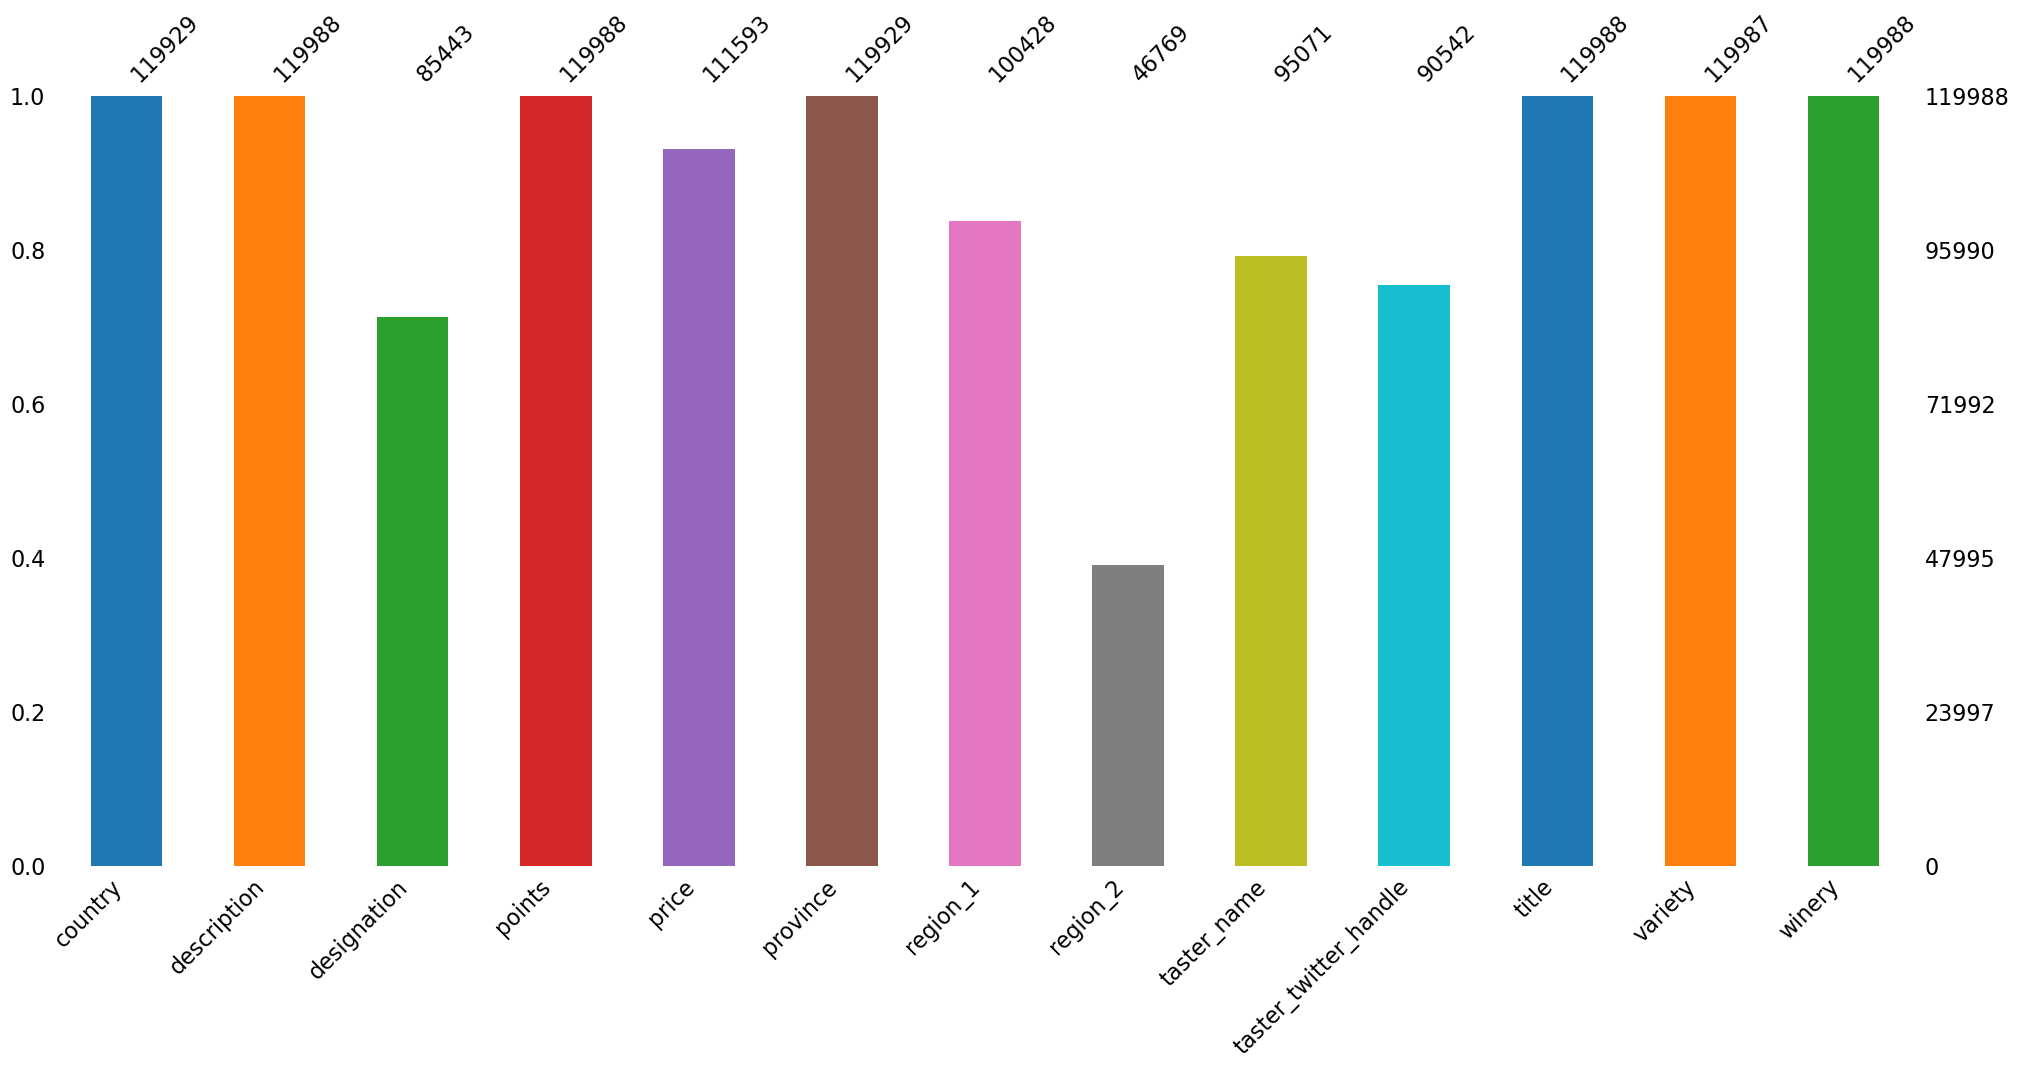

In [11]:
msno.bar(wine_reviews_df, color= sns.color_palette());

## 3. Asking meaningful questions

### Question 1

***Write question***

**Benefit:**

### Question 2

***Write question***

### **Benefit:**

### Question 3

***Write question***

### **Benefit:**

## 4. Preprocessing + analyzing data to answer each question

### Question 1:

### Preprocessing

#### Explanation

In [12]:
# Code

### Data Analysis

#### Explanation:

In [13]:
# Code

### Data Visualization

In [14]:
# Code

***Comments:***

### Question 2:

### Preprocessing

#### Explanation:

In [15]:
# Code

### Data Analysis

#### Explanation:

In [16]:
# Code

### Data Visualization

In [17]:
# Code

***Comments:***

### Question 3:

### Preprocessing

#### Explanation:

In [18]:
# Code

### Data Analysis

#### Explanation:

In [19]:
# Code

### Data Visualization

In [20]:
# Code

***Comments***

## 5.Reflection

## 6.References